In [1]:
def checkinput(test):
    rows = len(test)
    cols = len(test [0])
    for r in range(rows):
      for c in range(cols):
          if type(test[r][c]) == str:
              return False
          elif c + 1 < cols:
              if test[r][c] == test[r][c+1]:
                  return False
    for c in range(cols):
        for r in range(rows):
            if r+1 < rows:
              if test[r][c] == test[r+1][c]:
                  return False
    return True
test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return true




True
False
True


In [2]:
import pandas as pd
stms=pd.read_csv('StudentMarkSheet.csv')
stms.info()

stms.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0


In [3]:
print(len(stms),"\n")

nr=len(stms) - len(stms.dropna())
print (nr,"\n")
ra=len(stms.dropna())
print (ra)


200 

4 

196


In [4]:
print('Student name = James Walker\n',
    stms[stms['Student name'] == 'James Walker']
    [['Exam name','Marks']]
    )

Student name = James Walker
        Exam name  Marks
0        Biology   31.0
42     Chemistry   61.0
71   Mathematics   23.0
150      Physics  100.0
180    Sociology   73.0


In [5]:
import numpy as np
avgM = stms['Marks'].agg(np.mean)
print (avgM)

50.40609137055838


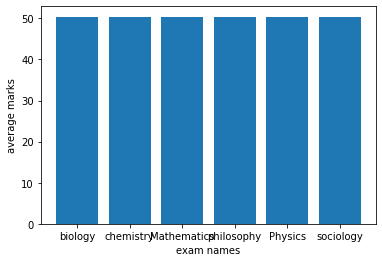

In [6]:
import matplotlib.pyplot as plt
exam = ['biology', 'chemistry', 'Mathematics', 'philosophy', 'Physics','sociology']
plt.bar(exam,avgM)
plt.xlabel("exam names")
plt.ylabel("average marks")
plt.show()

In [7]:
cd = pd.read_csv('CatData.csv')
cd.info()
print(len(cd),"\n")

nr=len(cd) - len(cd.dropna())
print (nr,"\n")
ra=len(cd.dropna())
print (ra)
# it means no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB
342 

0 

342


In [8]:
#Main function to find the coefficients of Line:
def simple_linear_regression(input_feature,output):
    
    Xi = input_feature
    Yi = output
    
    #Total number of data points:
    n = len(Xi)
    
    #X bar:
    Xi_mean = Xi.mean()
    
    #Y bar:
    Yi_mean = Yi.mean()
    
    #Sum of X:
    S_Xi = (Xi).sum()
    
    #Sum of Y:
    S_Yi = (Yi).sum()
    
    #Sum of (X*Y) multiplied by n:
    S_XiYi = ((Xi*Yi).sum())*n
    
    #Sum of X*Sum of Y:
    S_Xi_S_Yi = S_Xi*S_Yi
    
    #Sum of (X*X) multiplied by n:
    S_XiXi = ((Xi*Xi).sum())*n
    
    #Square of sum of X:
    S_Xi_Square = S_Xi*S_Xi
    
    #SLope:
    slope = (S_XiYi- S_Xi_S_Yi) / (S_XiXi-S_Xi_Square)
    
    #Intercept:
    intercept = Yi_mean - slope * Xi_mean
    
    return slope, intercept

val = int(len(cd)*0.8)
train = cd[:val]
test = cd[val:]

actual_slope, actual_intercept = simple_linear_regression(train['Mass (kg)'], train['Tail Length (cm)'])

from sklearn.linear_model import LinearRegression

train_x = np.array(train[['Mass (kg)']])
train_y = np.array(train[['Tail Length (cm)']])

reg = LinearRegression().fit(train_x, train_y)

coeff = reg.coef_
intercept = reg.intercept_

In [9]:
print('Slope', coeff)
print('Y-intercept', intercept)

Slope [[1.59183664]]
Y-intercept [13.34657289]


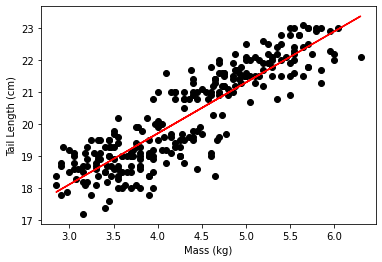

In [10]:
plt.scatter(train['Mass (kg)'], train['Tail Length (cm)'], c='black')
plt.plot(train_x, coeff[0]*train_x + intercept, color='red')
plt.xlabel('Mass (kg)'); plt.ylabel('Tail Length (cm)')
plt.show()